## Explore Truth

- Perform EDA on _truth_ Data.

In [1]:
import sys, os, glob, yaml

In [2]:
import math
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import trackml.dataset
import seaborn as sns

In [4]:
sys.path.append('src')

### _Dataset_

In [5]:
# mu- data (old)
# input_dir = './data_sets/pandaml/data_3.0_7.0_GeV/'

# mu+mu- data (current)
input_dir = './data_sets/pandaml/data_0.1_1.5_GeV/'

# pbarp data (coming)
# input_dir = os.environ['HOME']+'/current/2_deepana/pandaml/data/'

In [6]:
# Find All Input Data Files (hits.csv, cells.csv, particles.csv, truth.csv)
all_files = os.listdir(input_dir)

# Extract File Prefixes (use e.g. xxx-hits.csv)
suffix = '-hits.csv'
file_prefixes = sorted(os.path.join(input_dir, f.replace(suffix, ''))
                       for f in all_files if f.endswith(suffix))

In [7]:
file_prefixes[:10]

['./data_sets/pandaml/data_0.1_1.5_GeV/event0000000000',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000001',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000002',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000003',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000004',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000005',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000006',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000007',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000008',
 './data_sets/pandaml/data_0.1_1.5_GeV/event0000000009']

In [8]:
event_id = 0
event_prefix = file_prefixes[event_id]

In [9]:
# load an event
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

## Truth
The truth file contains the mapping between hits and generating particles and the true particle state at each measured hit. Each entry maps one hit to one particle.  
* __hit_id__: numerical identifier of the hit as defined in the hits file.
* __particle_id__: numerical identifier of the generating particle as defined in the particles file. A value of 0 means that the hit did not originate from a reconstructible particle, but e.g. from detector noise.
* __tx, ty, tz__ true intersection point in global coordinates (in millimeters) between the particle trajectory and the sensitive surface.
* __tpx, tpy, tpz__ true particle momentum (in GeV/c) in the global coordinate system at the intersection point. The corresponding vector is tangent to the particle trajectory at the intersection point.
* __weight__ per-hit weight used for the scoring metric; total sum of weights within one event equals to one.

In [10]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-14.852000,-10.6347,43.741699,-0.273197,-0.162639,0.765421,1.0,10
1,2,-15.722200,-11.1478,46.171398,-0.274899,-0.160593,0.765203,1.0,10
2,3,-16.597000,-11.6535,48.600101,-0.276364,-0.157971,0.765186,1.0,10
3,4,-17.476700,-12.1505,51.029800,-0.277693,-0.155004,0.765268,1.0,10
4,5,-18.360901,-12.6388,53.460499,-0.279028,-0.152464,0.765253,1.0,10


In [11]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,0.417332,0.938952,-0.457557,1,25,13,0
1,2,0.0,0.0,0.0,-0.493657,-0.352344,0.712380,1,24,13,0
2,3,0.0,0.0,0.0,-0.166948,0.059120,0.264588,1,26,13,0
3,4,0.0,0.0,0.0,0.573950,0.219286,-0.417693,1,22,13,0
4,5,0.0,0.0,0.0,-0.296571,0.510891,0.733194,1,26,13,0


In [12]:
# get 1st row, 0th colum which returns a single particle_id (from row)
particles.iloc[1,0]

2

In [13]:
# get true hits from particle_id = particles.iloc[1,0]
truth[truth.particle_id == particles.iloc[1,0]].head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
191,192,-13.9136,-11.1992,20.993099,-0.441819,-0.402893,0.707635,1.0,2
192,193,-14.6397,-11.8646,22.158701,-0.439556,-0.405131,0.707733,1.0,2
193,194,-15.1432,-12.3300,22.970800,-0.438114,-0.406254,0.707952,1.0,2
194,195,-15.8641,-13.0020,24.138201,-0.436021,-0.408526,0.707897,1.0,2
195,196,-16.5800,-13.6762,25.302799,-0.433938,-0.410951,0.707734,1.0,2


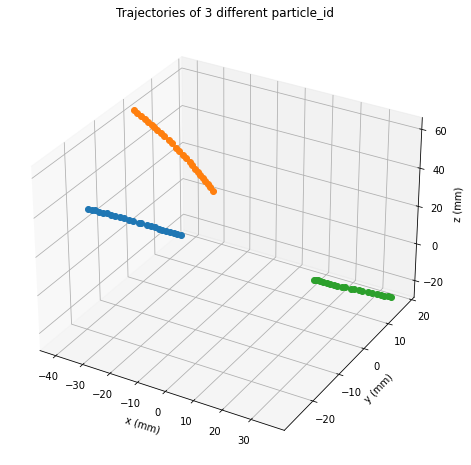

In [14]:
# For starters, let's see some trajectories from the truth dataset.

# get the information for some particles
truth_0 = truth[truth.particle_id == particles.iloc[1,0]]
truth_1 = truth[truth.particle_id == particles.iloc[2,0]]
truth_2 = truth[truth.particle_id == particles.iloc[3,0]]

# create figure instance
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# plot each particle's path
ax.plot(
    xs=truth_0.tx,
    ys=truth_0.ty,
    zs=truth_0.tz, marker='o')

ax.plot(
    xs=truth_1.tx,
    ys=truth_1.ty,
    zs=truth_1.tz, marker='o')

ax.plot(
    xs=truth_2.tx,
    ys=truth_2.ty,
    zs=truth_2.tz, marker='o')

ax.set_title('Trajectories of 3 different particle_id')
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
plt.show()

## Let's plot some particle tracks

In [15]:
# list particle_ids
truth.particle_id.unique()

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [16]:
# every 4th particle from the list
truth.particle_id.unique()[0::4]

array([10,  6,  2])

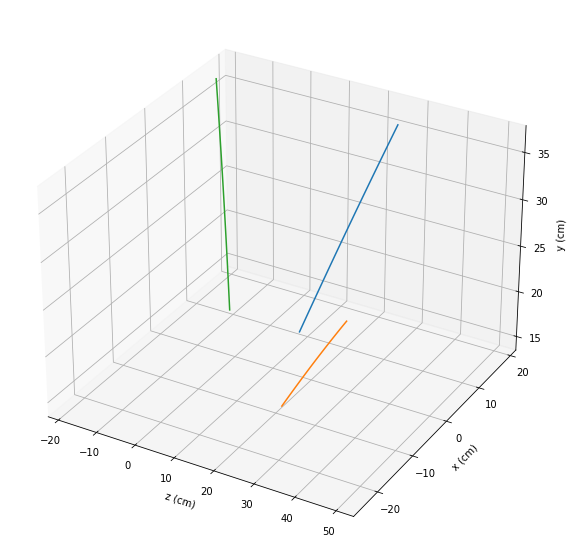

In [17]:
# Get every 4th particle from list of unique particle_ids.
tracks = truth.particle_id.unique()[1::4]

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
for track in tracks:
    t = truth[truth.particle_id == track]
    ax.plot3D(t.tz, t.tx, t.ty)

ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')
plt.show()